In [64]:
palette = {
    'before-saline': 'orange',
    'after-saline': 'green',
    'before-drug': '#1F77B4',
    'after-drug': '#DA7F8C',
}

traces = {
    'D13_4': {
        3: (0.1, 6), 
        26: (0.1, 3.5), 
    },
    'D13_8': {
        28: (5, 6.25), 
    },
    'D14_6': {
        0: (1, 4.5), 
        56: (1, 5), 
        57: (1, 7), 
    },
}


In [7]:
import anndata as ad 
import matplotlib.pyplot as plt
import numpy as np
import os
import scanpy 
import scanpy.external as sce
import seaborn as sns 
import spikeinterface.core as sc 
import spikeinterface.extractors as se 
import pandas as pd 
from statannotations.Annotator import Annotator

sampling_frequency = 30000
n_ms_per_s = 1000
n_frames_per_ms = sampling_frequency // n_ms_per_s
ms_before = 2
spike_index = n_frames_per_ms * ms_before
n_s_per_min = 60
n_file_compared = 4
files = pd.read_csv('curation_results.csv')
file_index_before_drug = 20
file_index_after_drug = 30
n_file_per_condition = 10

figure_output_folder = 'data/processed/figures'
os.makedirs(figure_output_folder, exist_ok=True)    

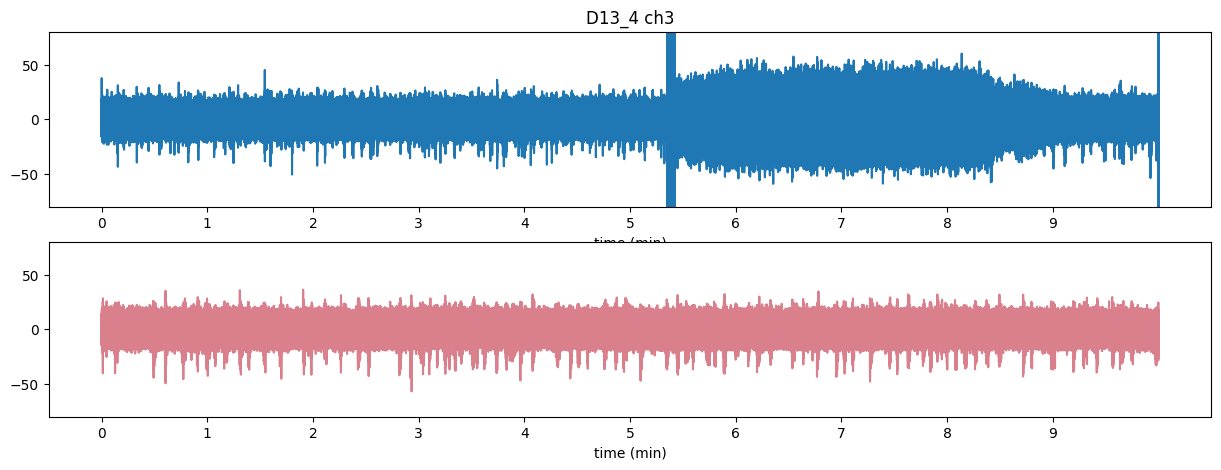

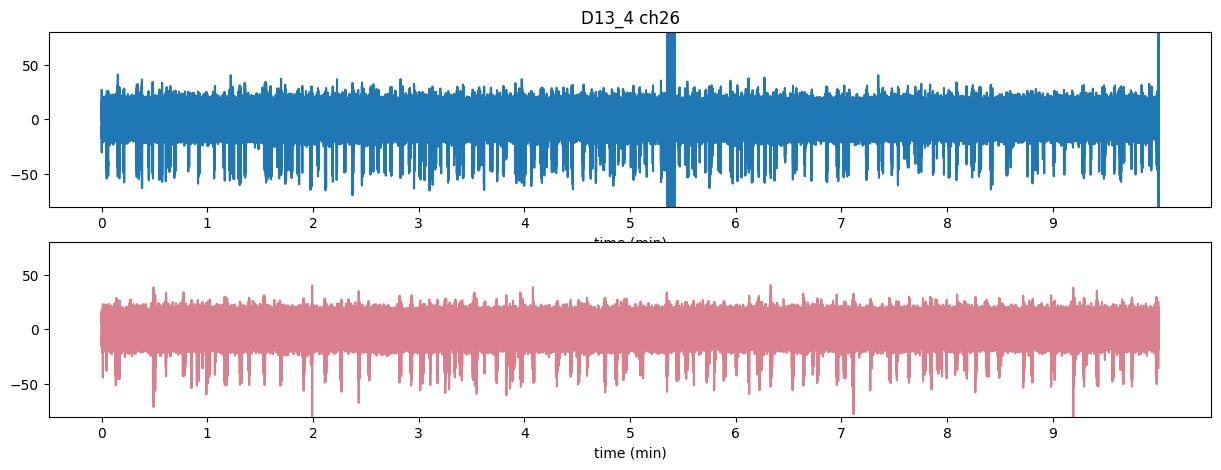

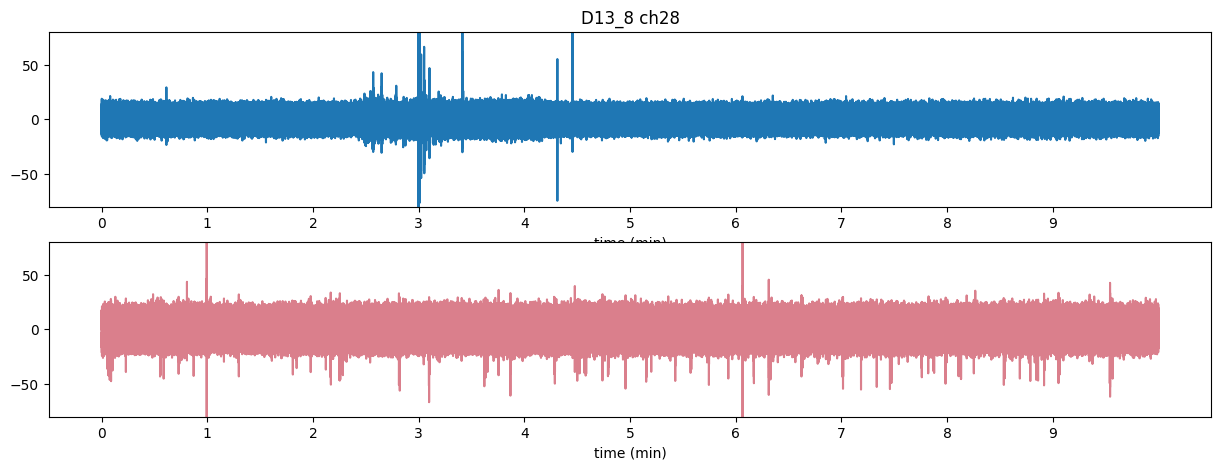

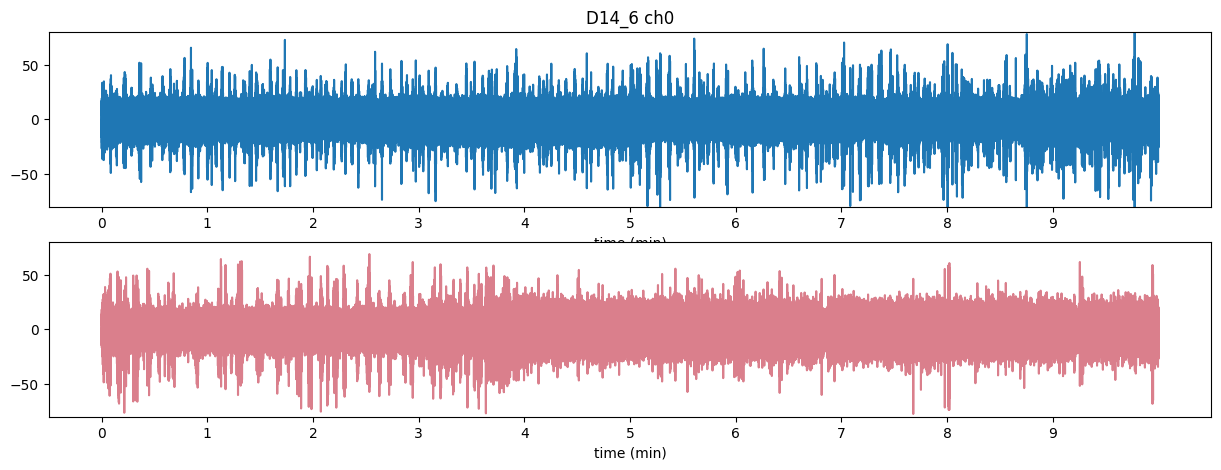

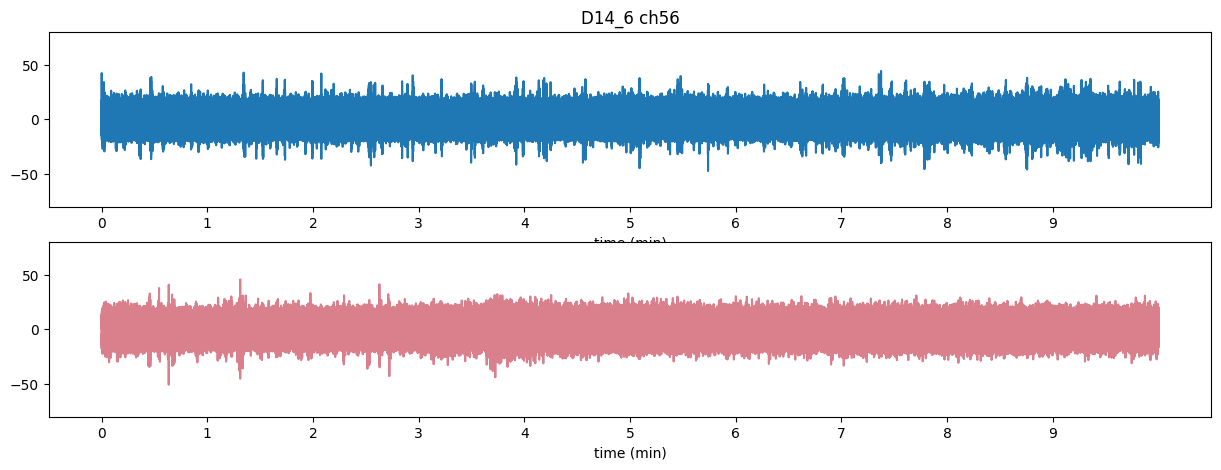

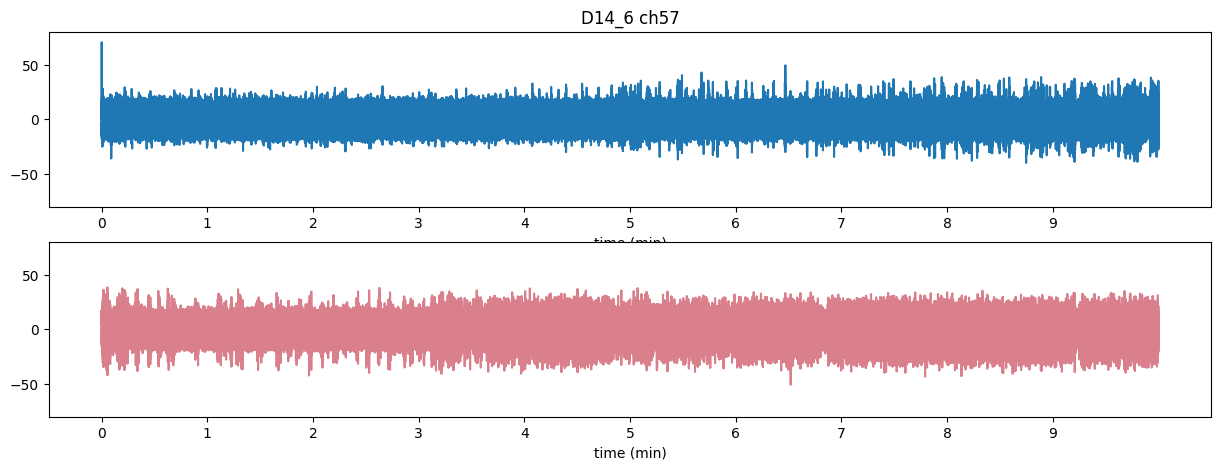

In [4]:
all_waveforms, all_extremums = [], []
for subject, subject_channels in traces.items():
        
    recordings_folder = f'data/processed/{subject}/240319/recordings'
    
    for channel_index in subject_channels:
        recordings_before_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_before_drug, file_index_before_drug+n_file_per_condition)
        ]

        recordings_after_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_after_drug, file_index_after_drug+n_file_per_condition)
        ]

        plt.figure(figsize=(15, 5))
        ax = plt.subplot(2, 1, 1)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_before_drug])[channel_index], color=palette['before-drug'])
        ax.set_xticks(np.arange(10) * sampling_frequency * n_s_per_min, np.arange(10))
        ax.set_xlabel('time (min)')
        ax.set_title(f'{subject} ch{channel_index}')
        ax.set_ylim(-80, 80)

        ax = plt.subplot(2, 1, 2)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_after_drug])[channel_index], color=palette['after-drug'])
        ax.set_xticks(np.arange(10) * sampling_frequency * n_s_per_min, np.arange(10))
        ax.set_xlabel('time (min)')
        ax.set_ylim(-80, 80)

        # plt.savefig(f'{figure_output_folder}/{subject}_{channel_index}_full.png')
        plt.show()
        plt.close()

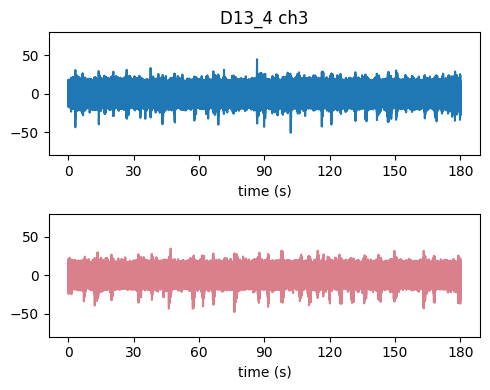

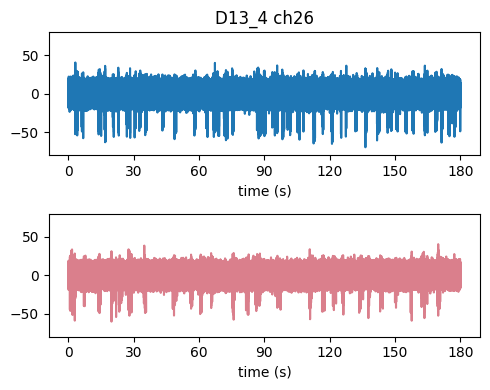

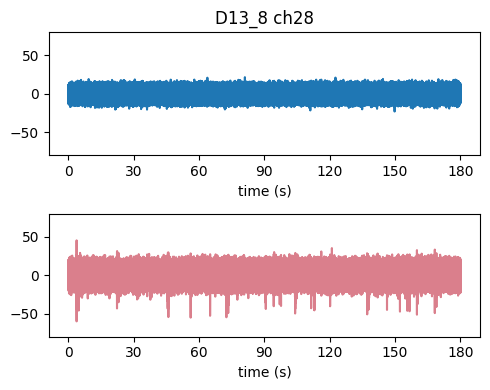

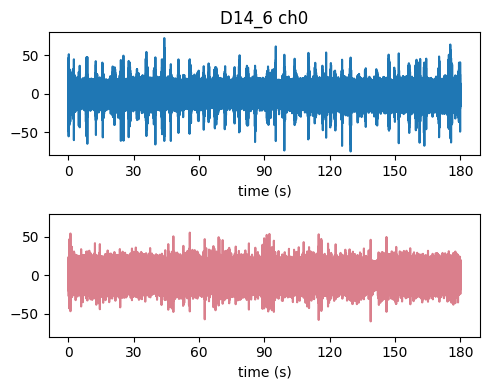

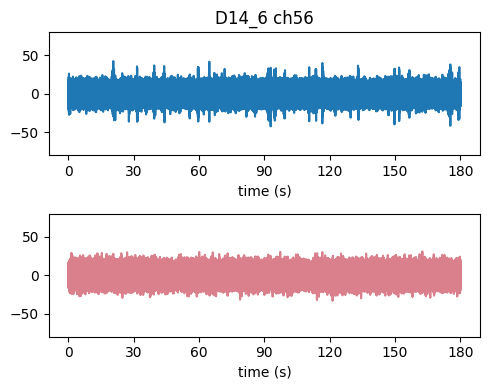

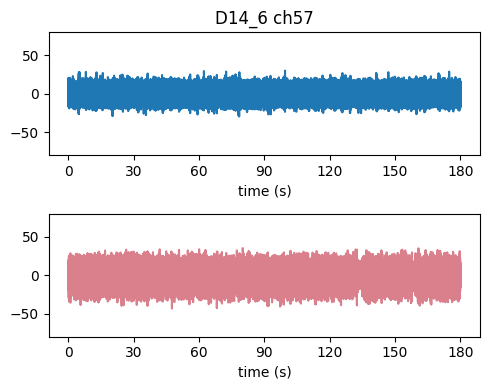

In [22]:
all_waveforms, all_extremums = [], []
plot_duration_min = 3
for subject, subject_channels in traces.items():
        
    recordings_folder = f'data/processed/{subject}/240319/recordings'
    
    for channel_index, (before_drug_t_start, after_drug_t_start) in subject_channels.items():
        recordings_before_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_before_drug, file_index_before_drug+n_file_per_condition)
        ]

        recordings_after_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_after_drug, file_index_after_drug+n_file_per_condition)
        ]

        plt.figure(figsize=(5, 4))
        ax = plt.subplot(2, 1, 1)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_before_drug])[channel_index, int(sampling_frequency * n_s_per_min * before_drug_t_start):int(sampling_frequency * n_s_per_min * (before_drug_t_start + plot_duration_min))], color=palette['before-drug'])
        ax.set_xticks(np.arange(7) * sampling_frequency * 30, np.arange(7) * 30)
        ax.set_xlabel('time (s)')
        ax.set_title(f'{subject} ch{channel_index}')
        ax.set_ylim(-80, 80)

        ax = plt.subplot(2, 1, 2)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_after_drug])[channel_index][int(sampling_frequency * n_s_per_min * after_drug_t_start):int(sampling_frequency * n_s_per_min * (after_drug_t_start + plot_duration_min))], color=palette['after-drug'])
        ax.set_xticks(np.arange(7) * sampling_frequency * 30, np.arange(7) * 30)
        ax.set_xlabel('time (s)')
        ax.set_ylim(-80, 80)

        plt.tight_layout()
        plt.savefig(f'{figure_output_folder}/{subject}_{channel_index}.pdf')
        plt.show()
        plt.close()

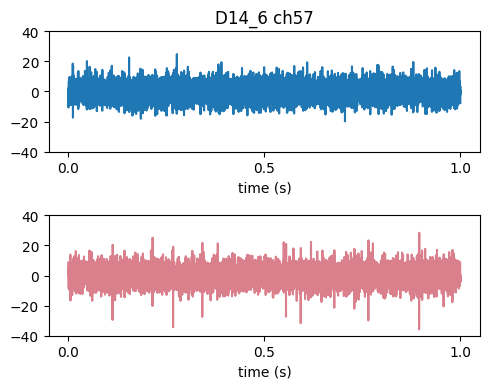

In [20]:
all_waveforms, all_extremums = [], []
plot_buffer = 120 / n_s_per_min
plot_duration_min = 1 / n_s_per_min
for subject, subject_channels in traces.items():
    if subject != 'D14_6': continue # mice number input
    recordings_folder = f'data/processed/{subject}/240319/recordings'
    
    for channel_index, (before_drug_t_start, after_drug_t_start) in subject_channels.items():
        if channel_index != 57: continue  # channel index input
        recordings_before_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_before_drug, file_index_before_drug+n_file_per_condition)
        ]

        recordings_after_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_after_drug, file_index_after_drug+n_file_per_condition)
        ]

        plt.figure(figsize=(5, 4))
        ax = plt.subplot(2, 1, 1)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_before_drug])[channel_index, int(sampling_frequency * n_s_per_min * (before_drug_t_start+plot_buffer)):int(sampling_frequency * n_s_per_min * (before_drug_t_start+plot_buffer + plot_duration_min))], color=palette['before-drug'])
        ax.set_xticks(np.arange(3) * sampling_frequency*0.5, np.arange(3)*0.5)
        ax.set_xlabel('time (s)')
        ax.set_title(f'{subject} ch{channel_index}')
        ax.set_ylim(-40, 40)

        ax = plt.subplot(2, 1, 2)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_after_drug])[channel_index][int(sampling_frequency * n_s_per_min * (after_drug_t_start+plot_buffer)):int(sampling_frequency * n_s_per_min * (after_drug_t_start+plot_buffer + plot_duration_min))], color=palette['after-drug'])
        ax.set_xticks(np.arange(3) * sampling_frequency*0.5, np.arange(3)*0.5)
        ax.set_xlabel('time (s)')
        ax.set_ylim(-40, 40)

        plt.tight_layout()
        plt.savefig(f'{figure_output_folder}/{subject}_{channel_index}_zoom.pdf')
        plt.show()
        plt.close()

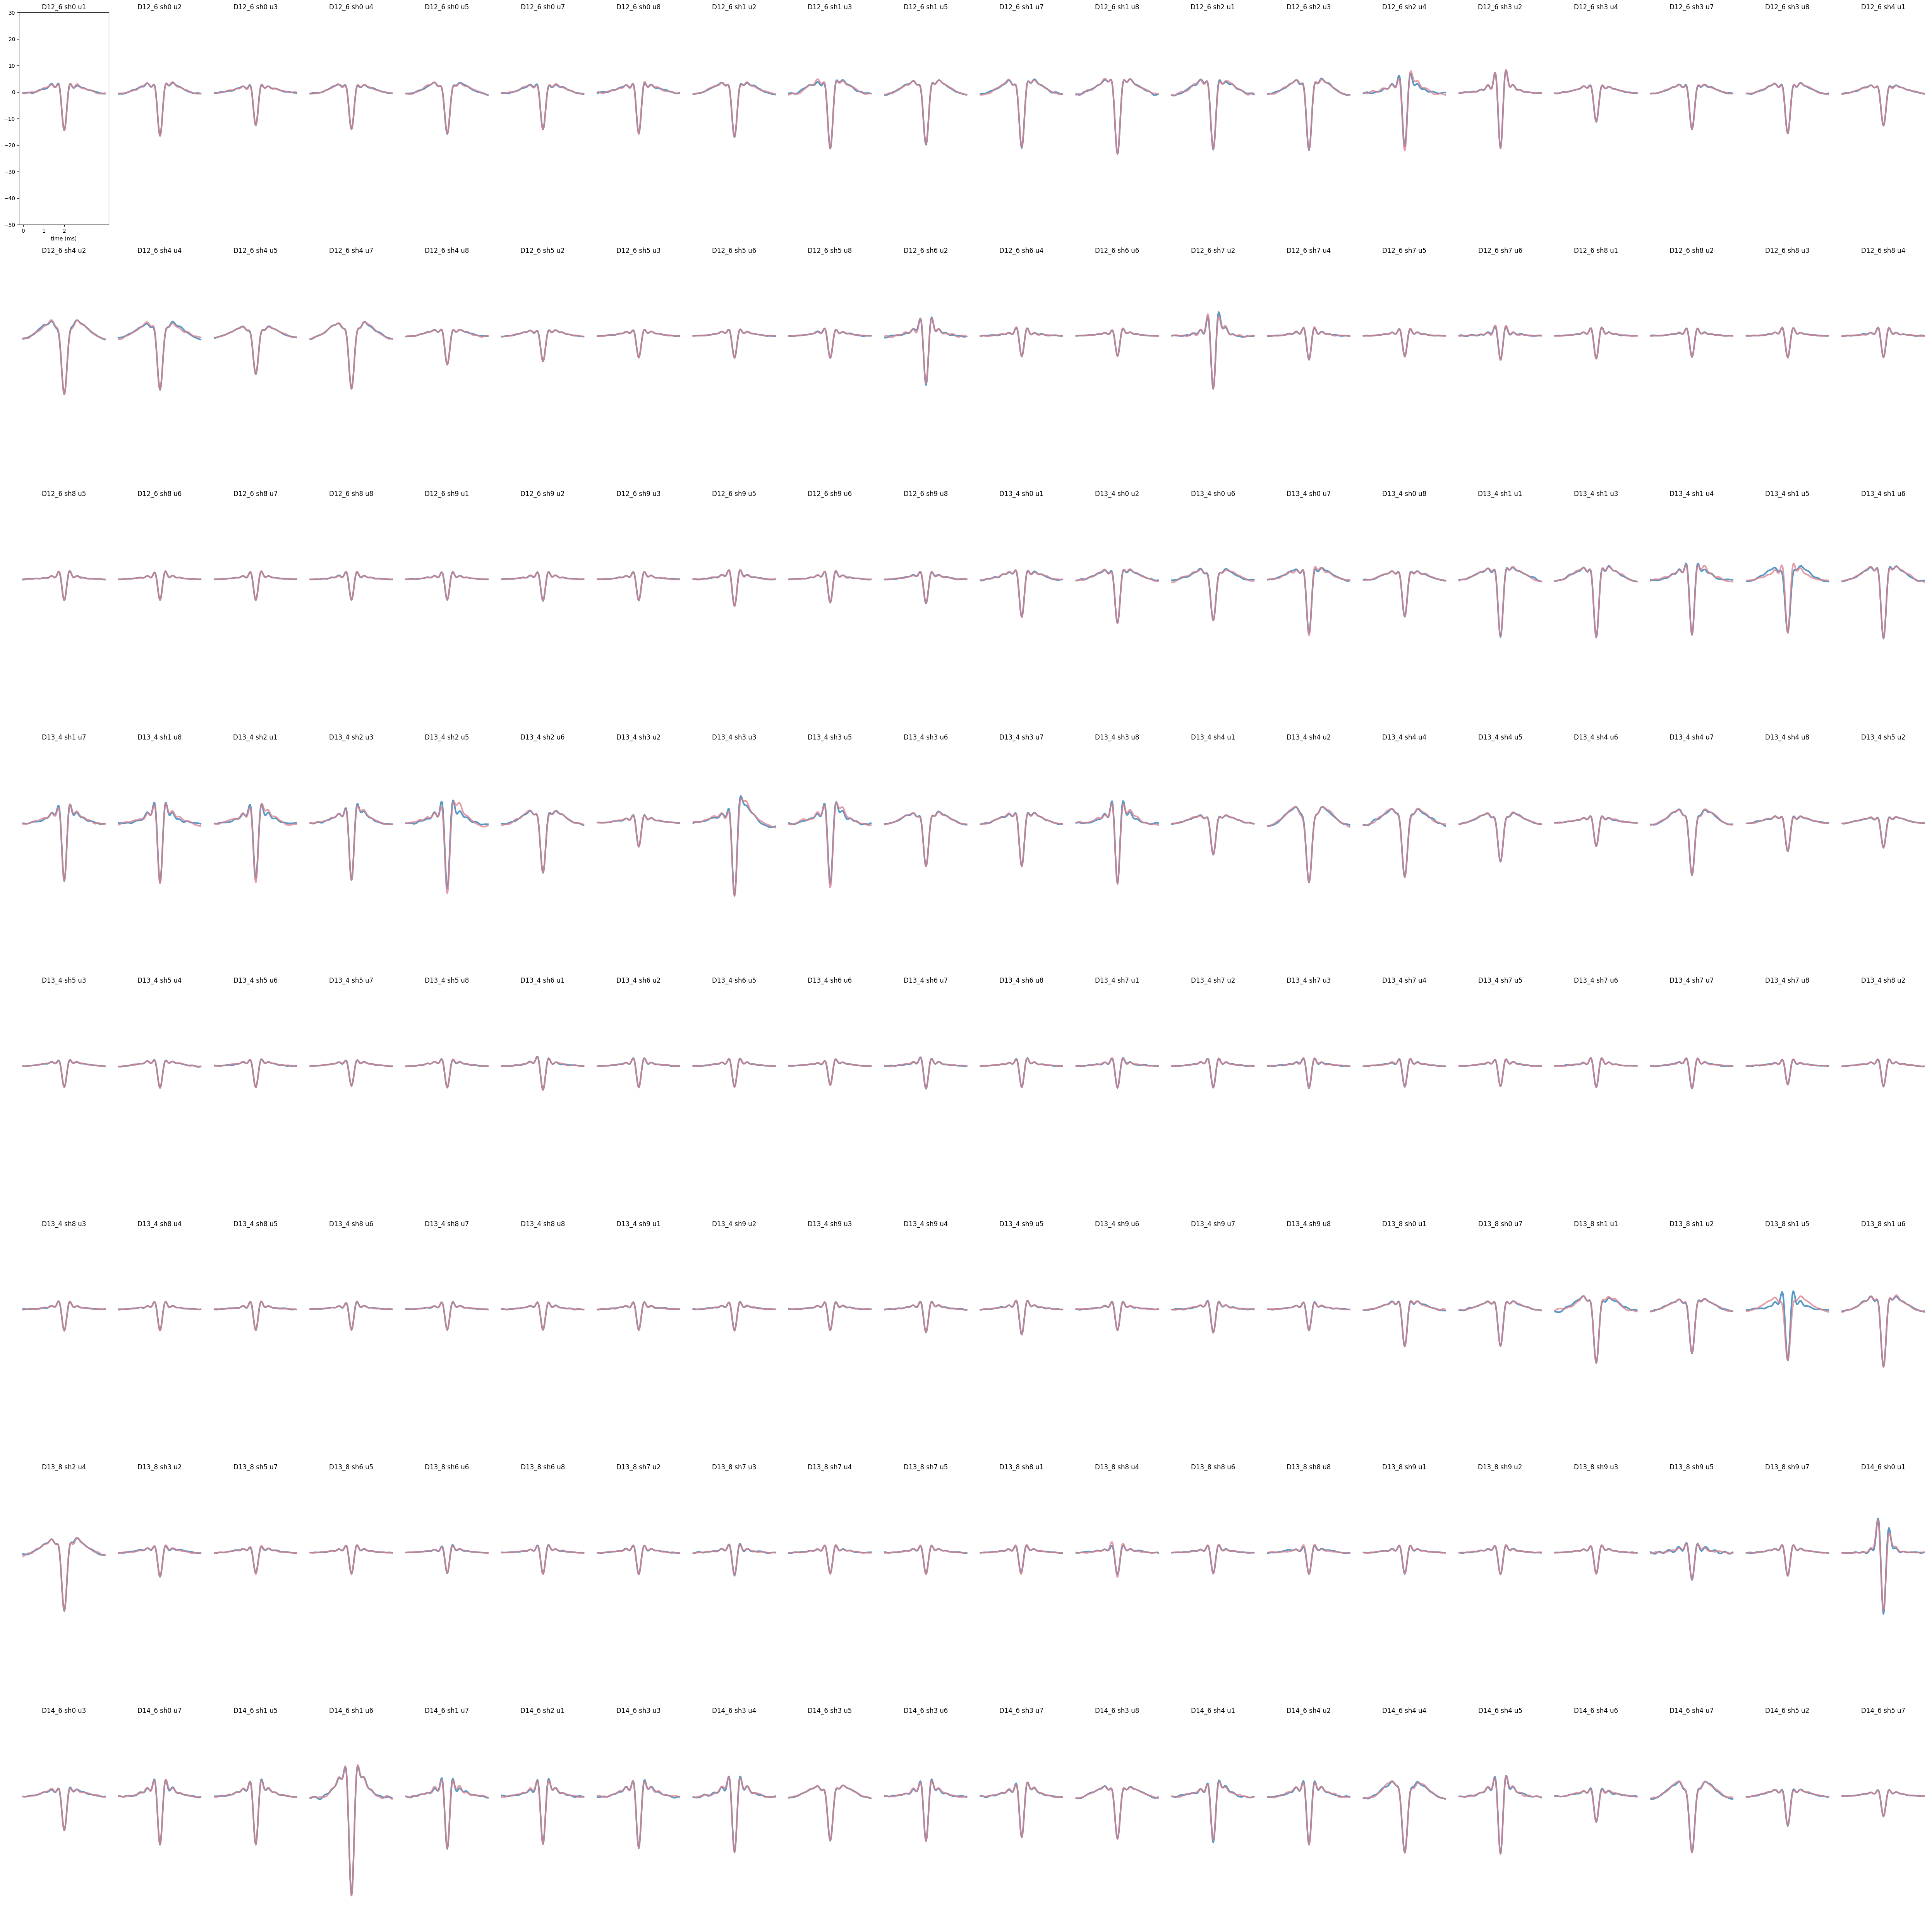

In [133]:
import spikeinterface.extractors as se
import pandas as pd 

curation_traces = pd.read_csv('curation_traces.csv')
conditions = ['before-saline', 'after-saline', 'before-drug', 'after-drug']
threshold = 3.5
expected_file_count = 16
min_considered_firing_per_min = 100

curated_units = []
for subject in sorted(curation_traces['mouse'].unique()):
    subject_curations = curation_traces[curation_traces['mouse'] == subject]

    for shank in sorted(subject_curations['shank'].unique()):
        
        shank_curations = subject_curations[subject_curations['shank'] == shank]

        file_indices = {
            condition: shank_curations[condition].item().split(',') for condition in conditions
        }
        
        shank_file_indices = [int(file_index) for condition in conditions for file_index in file_indices[condition]]


        firing_counts = {}
        for file_index in shank_file_indices:
            sorting = se.NpzSortingExtractor(f'data/processed/{subject}/240319/traces-curation-sortings/shank{shank}-{threshold}/sorter_output/file{file_index}.npz')
            for unit_id in sorting.unit_ids:
                spike_train = sorting.get_unit_spike_train(unit_id=unit_id)
                unit_firing_counts = firing_counts.get(unit_id, {})
                unit_firing_counts[file_index] = len(spike_train)
                firing_counts[unit_id] = unit_firing_counts
        for unit_id, unit_firing_counts in firing_counts.items():
            fired_file_counts = len([count for count in unit_firing_counts.values() if count >= min_considered_firing_per_min])
            
            if fired_file_counts == expected_file_count:
                curated_units.append({ 'mouse': subject, 'shank': shank, 'unit_id': unit_id})

curated_units = pd.json_normalize(curated_units)

curation_traces = pd.read_csv('curation_traces.csv')
conditions = ['before-saline', 'after-saline', 'before-drug', 'after-drug']

n_col = 20
n_row = np.ceil(len(curated_units) / n_col).astype(int)
plt.figure(figsize=(50, 50))
all_waveforms, all_extremums = [], []
for unit_index, curated_unit in curated_units.iterrows():    
    shank_curations = curation_traces[(curation_traces['mouse'] == curated_unit['mouse']) & (curation_traces['shank'] == curated_unit['shank'])]
    
    files_before_drug = shank_curations['before-drug'].item().split(',')
    files_after_drug = shank_curations['after-drug'].item().split(',')

    sortings_folder = f'data/processed/{curated_unit["mouse"]}/240319/traces-curation-sortings/shank{curated_unit["shank"]}-{threshold}'
    sortings_before_drug = [
        se.NpzSortingExtractor(f'{sortings_folder}/sorter_output/file{file_index}.npz') 
            for file_index in files_before_drug
    ]
    sortings_after_drug = [
        se.NpzSortingExtractor(f'{sortings_folder}/sorter_output/file{file_index}.npz') 
            for file_index in files_after_drug
    ]

    waveforms_folder = f'data/processed/{curated_unit["mouse"]}/240319/traces-curation-waveforms/shank{curated_unit["shank"]}-{threshold}'
    waveform_extractors_before_drug = [
        sc.load_waveforms(folder=f'{waveforms_folder}/file{file_index}', with_recording=True, sorting=sortings_before_drug[segment]) 
        for segment, file_index in enumerate(files_before_drug)
    ]
    waveform_extractors_after_drug = [
        sc.load_waveforms(folder=f'{waveforms_folder}/file{file_index}', with_recording=True, sorting=sortings_after_drug[segment]) 
        for segment, file_index in enumerate(files_after_drug)
    ]

    extremum_channels_before_drug = [sc.get_template_extremum_channel(waveform_extractor, peak_sign='neg')[curated_unit['unit_id']] for waveform_extractor in waveform_extractors_before_drug]
    extremum_channels_before_drug = [np.where(waveform_extractor.channel_ids == extremum_channel)[0].item() for extremum_channel, waveform_extractor in zip(extremum_channels_before_drug, waveform_extractors_before_drug)]
    extremum_before_drug = np.vstack([waveform_extractor.get_waveforms(curated_unit['unit_id'])[:, :, extremum_channel] for waveform_extractor, extremum_channel in zip(waveform_extractors_before_drug, extremum_channels_before_drug)])

    extremum_channels_after_drug = [sc.get_template_extremum_channel(waveform_extractor, peak_sign='neg')[curated_unit['unit_id']] for waveform_extractor in waveform_extractors_after_drug]
    extremum_channels_after_drug = [np.where(waveform_extractor.channel_ids == extremum_channel)[0].item() for extremum_channel, waveform_extractor in zip(extremum_channels_after_drug, waveform_extractors_after_drug)]
    extremum_after_drug = np.vstack([waveform_extractor.get_waveforms(curated_unit['unit_id'])[:, :, extremum_channel] for waveform_extractor, extremum_channel in zip(waveform_extractors_after_drug, extremum_channels_after_drug)])

    template_before_drug = extremum_before_drug.mean(0)
    template_after_drug = extremum_after_drug.mean(0)

    ax = plt.subplot(n_row, n_col, unit_index+1)
    ax.set_title(f'{curated_unit["mouse"]} sh{curated_unit["shank"]} u{curated_unit["unit_id"]}')
    ax.plot(template_before_drug, color=palette['before-drug'], alpha=0.75, linewidth=3)
    ax.plot(template_after_drug, color=palette['after-drug'], alpha=0.75, linewidth=3)
    ax.set_ylim(-50, 30)
    ax.set_xticks([0, n_frames_per_ms, n_frames_per_ms*2], [0, 1, 2])
    ax.set_xlabel('time (ms)')
    if unit_index != 0: ax.set_axis_off()
plt.tight_layout()
plt.savefig(f'{figure_output_folder}/waveforms.pdf')
plt.show()
plt.close()

In [134]:
for unit_index, curated_unit in curated_units.iterrows():    
    subject = curated_unit['mouse']
    shank = curated_unit['shank']
    unit_id = curated_unit['unit_id']
    shank_curations = curation_traces[(curation_traces['mouse'] == curated_unit['mouse']) & (curation_traces['shank'] == curated_unit['shank'])]
    
    for substance in ['saline', 'drug']:
        files_before = shank_curations[f'before-{substance}'].item().split(',')
        files_after = shank_curations[f'after-{substance}'].item().split(',')

        sortings_folder = f'data/processed/{subject}/240319/traces-curation-sortings/shank{shank}-{threshold}'
        sortings_before = [
            se.NpzSortingExtractor(f'{sortings_folder}/sorter_output/file{file_index}.npz') 
                for file_index in files_before
        ]
        sortings_after = [
            se.NpzSortingExtractor(f'{sortings_folder}/sorter_output/file{file_index}.npz') 
                for file_index in files_after
        ]

        waveforms_folder = f'data/processed/{subject}/240319/traces-curation-waveforms/shank{shank}-{threshold}'
        waveform_extractors_before = [
            sc.load_waveforms(folder=f'{waveforms_folder}/file{file_index}', with_recording=True, sorting=sortings_before[segment]) 
            for segment, file_index in enumerate(files_before)
        ]
        waveform_extractors_after = [
            sc.load_waveforms(folder=f'{waveforms_folder}/file{file_index}', with_recording=True, sorting=sortings_after[segment]) 
            for segment, file_index in enumerate(files_after)
        ]

        waveforms_before = np.vstack([waveform_extractor.get_waveforms(unit_id) for waveform_extractor in waveform_extractors_before])
        waveforms_after = np.vstack([waveform_extractor.get_waveforms(unit_id) for waveform_extractor in waveform_extractors_after])

        extremum_channels_before = [sc.get_template_extremum_channel(waveform_extractor, peak_sign='neg')[unit_id] for waveform_extractor in waveform_extractors_before]
        extremum_channels_before = [np.where(waveform_extractor.channel_ids == extremum_channel)[0].item() for extremum_channel, waveform_extractor in zip(extremum_channels_before, waveform_extractors_before)]
        extremum_before = np.vstack([waveform_extractor.get_waveforms(unit_id)[:, :, extremum_channel] for waveform_extractor, extremum_channel in zip(waveform_extractors_before, extremum_channels_before)])

        extremum_channels_after = [sc.get_template_extremum_channel(waveform_extractor, peak_sign='neg')[unit_id] for waveform_extractor in waveform_extractors_after]
        extremum_channels_after = [np.where(waveform_extractor.channel_ids == extremum_channel)[0].item() for extremum_channel, waveform_extractor in zip(extremum_channels_after, waveform_extractors_after)]
        extremum_after = np.vstack([waveform_extractor.get_waveforms(unit_id)[:, :, extremum_channel] for waveform_extractor, extremum_channel in zip(waveform_extractors_after, extremum_channels_after)])

        waveforms_adata = ad.AnnData(np.vstack([waveforms_before, waveforms_after]).reshape(len(waveforms_before) + len(waveforms_after), -1))
        waveforms_adata.obs['condition'] = [f'before-{substance}'] * len(waveforms_before) + [f'after-{substance}'] * len(waveforms_after)
        waveforms_adata.obs['subject'] = subject 
        waveforms_adata.obs['shank'] = shank
        waveforms_adata.obs['unit_id'] = unit_id

        extremum_adata = ad.AnnData(np.vstack([extremum_before, extremum_after]).reshape(len(extremum_before) + len(extremum_after), -1))
        extremum_adata.obs['condition'] = [f'before-{substance}'] * len(extremum_before) + [f'after-{substance}'] * len(extremum_after)
        extremum_adata.obs['subject'] = subject
        extremum_adata.obs['shank'] = shank
        extremum_adata.obs['unit_id'] = unit_id

        template_before = extremum_before.mean(0)
        template_after = extremum_after.mean(0)
        extremum_adata.obs['firing_rate'] = [len(extremum_before) / n_file_compared / n_s_per_min] * len(extremum_before) + [len(extremum_after) / n_file_compared / n_s_per_min] * len(extremum_after)
        extremum_adata.obs['trough'] = [template_before[spike_index]] * len(extremum_before) + [template_after[spike_index]] * len(extremum_after)
        extremum_adata.obs['peak'] = [template_before[spike_index:].max()] * len(extremum_before) + [template_after[spike_index:].max()] * len(extremum_after)

        all_waveforms.append(waveforms_adata)
        all_extremums.append(extremum_adata)

In [135]:
waveforms_adata = ad.concat(all_waveforms, index_unique='#')
extremums_adata = ad.concat(all_extremums, index_unique='#')

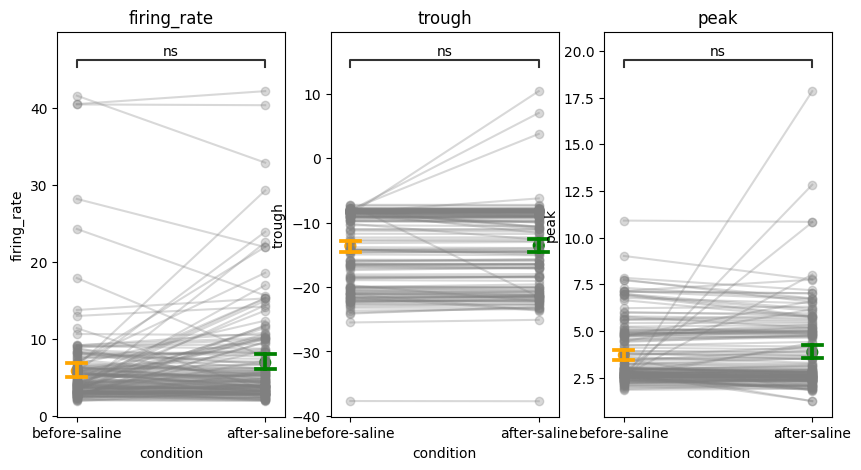

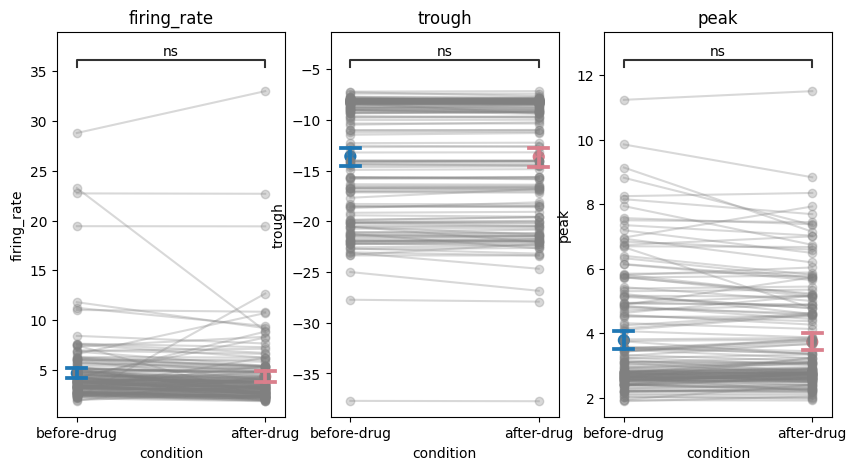

In [136]:
for substance in ['saline', 'drug']:
    stats = extremums_adata.obs.drop_duplicates()

    def draw_feature(feature, ax):
        def closure(grouped):
            ax.plot([0, 1], [grouped[grouped['condition'] == f'before-{substance}'][feature].item(), grouped[grouped['condition'] == f'after-{substance}'][feature].item()], marker='o', color='gray', alpha=0.3)
        return closure

    features = ['firing_rate', 'trough', 'peak']
    plt.figure(figsize=(10, 5))
    for feature_index, feature in (enumerate(features)):
        ax = plt.subplot(1, len(features), feature_index+1, zorder=1)
        stats.groupby(['subject', 'shank', 'unit_id']).apply(draw_feature(feature, ax))
        ax.set_title(feature)
        sns.pointplot(data=stats, x='condition', y=feature, order=[f'before-{substance}', f'after-{substance}'], ax=ax, capsize=0.1, palette=palette, zorder=10)
        annotator = Annotator(ax, [(f'before-{substance}', f'after-{substance}')], verbose=False, data=stats, x='condition', y=feature, order=[f'before-{substance}', f'after-{substance}'])
        annotator.configure(test="t-test_welch").apply_and_annotate()
    plt.savefig(f'{figure_output_folder}/stats-{substance}.pdf')
    plt.show()
    plt.close()

(<Axes: xlabel='substance', ylabel='abs(change in firing rate)'>,
 [<statannotations.Annotation.Annotation at 0x7fb1daed7a90>])

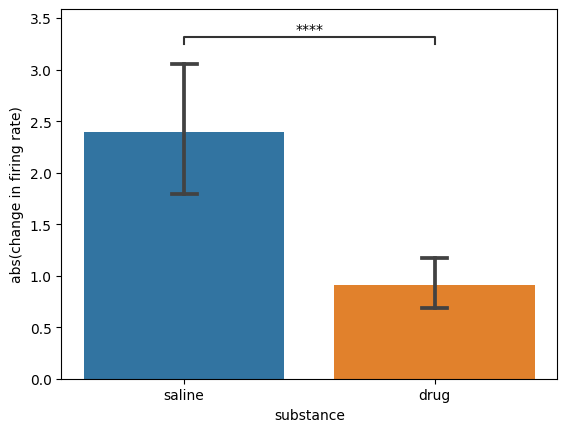

In [137]:
stats = extremums_adata.obs.drop_duplicates()

changes = []
def sum_absolute_change(grouped):
    for substance in ['saline', 'drug']:
        changes.append({
            'substance': substance,
            'abs(change in firing rate)': abs(grouped[grouped['condition'] == f'after-{substance}']['firing_rate'].item() - grouped[grouped['condition'] == f'before-{substance}']['firing_rate'].item())}
        )

stats.groupby(['subject', 'shank', 'unit_id']).apply(sum_absolute_change)
changes = pd.json_normalize(changes)

plt.figure()
ax = plt.gca()
sns.barplot(data=changes, x='substance', y='abs(change in firing rate)', ax=ax, capsize=0.1)
# sns.swarmplot(data=changes, x='substance', y='abs(change in firing rate)', ax=ax, color='black')
annotator = Annotator(ax, [('saline', 'drug')], verbose=False, data=changes, x='substance', y='abs(change in firing rate)')
annotator.configure(test="t-test_welch").apply_and_annotate()

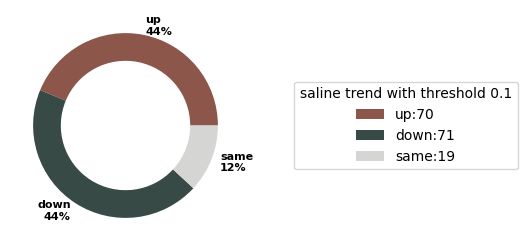

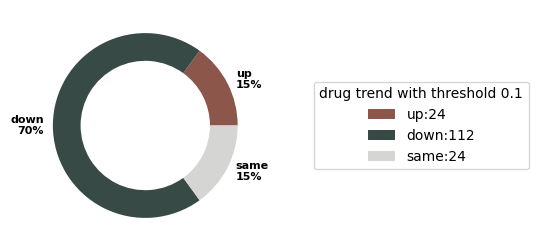

In [138]:
for substance in ['saline', 'drug']:
    stats = extremums_adata.obs.drop_duplicates()
    unit_counts = {
        'up': 0,
        'down': 0,
        'same': 0,
    }
    no_change_threshold = 0.1
    def count_unit(grouped):
        difference = abs(grouped[grouped['condition'] == f'after-{substance}']['firing_rate'].item() - grouped[grouped['condition'] == f'before-{substance}']['firing_rate'].item())
        if difference <= no_change_threshold:
            unit_counts['same'] += 1
        elif grouped[grouped['condition'] == f'after-{substance}']['firing_rate'].item() > grouped[grouped['condition'] == f'before-{substance}']['firing_rate'].item():
            unit_counts['up'] += 1
        else:
            unit_counts['down'] += 1
    stats.groupby(['subject', 'shank', 'unit_id']).apply(count_unit)


    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

    counts = list(unit_counts.values())
    trend_counts = [f'{k}:{v}' for k,v in unit_counts.items()]
    trend_percents = [f'{k}\n{v/sum(unit_counts.values())*100:0.0f}%' for k,v in unit_counts.items()]


    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{pct:.1f}%\n({absolute:d})"

    wedges, autotexts = ax.pie(counts, labels=trend_percents,
                                    wedgeprops=dict(width=0.3), colors=['#8C564B', '#374A46', '#d5d5d4'])

    ax.legend(wedges, trend_counts,
            title=f'{substance} trend with threshold {no_change_threshold}',
            loc="center left",
            bbox_to_anchor=(1.2, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")
    plt.savefig(f'{figure_output_folder}/pie-{substance}.pdf')
    plt.show()

In [37]:
scanpy.pp.neighbors(waveforms_adata)
scanpy.tl.pca(waveforms_adata)
scanpy.tl.tsne(waveforms_adata)
scanpy.tl.umap(waveforms_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [38]:
scanpy.pp.neighbors(extremums_adata)
scanpy.tl.pca(extremums_adata)
scanpy.tl.tsne(extremums_adata)
scanpy.tl.umap(extremums_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


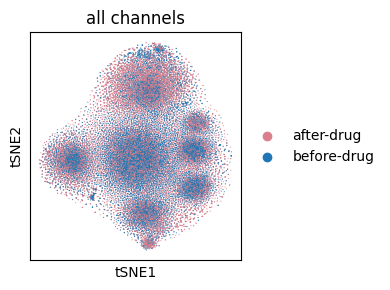

In [39]:
plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
scanpy.pl.tsne(waveforms_adata, color='condition', ax=ax, title='all channels', show=False, alpha=0.75, s=3, palette=palette)
plt.tight_layout()
plt.savefig(f'{figure_output_folder}/tsne.png', transparent=True)
plt.show()
plt.close()

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


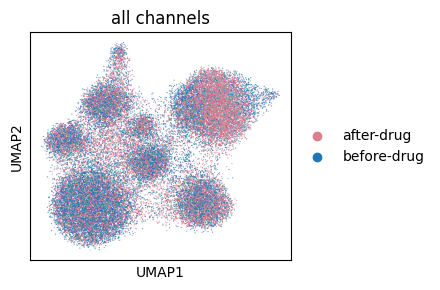

In [40]:
plt.figure(figsize=(4.5, 3))
ax = plt.subplot(1, 1, 1)
scanpy.pl.umap(waveforms_adata, color='condition', ax=ax, title='all channels', show=False, alpha=0.75, s=3, palette=palette)
plt.tight_layout()
plt.savefig(f'{figure_output_folder}/umap.png', transparent=True)
plt.show()
plt.close()

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No d

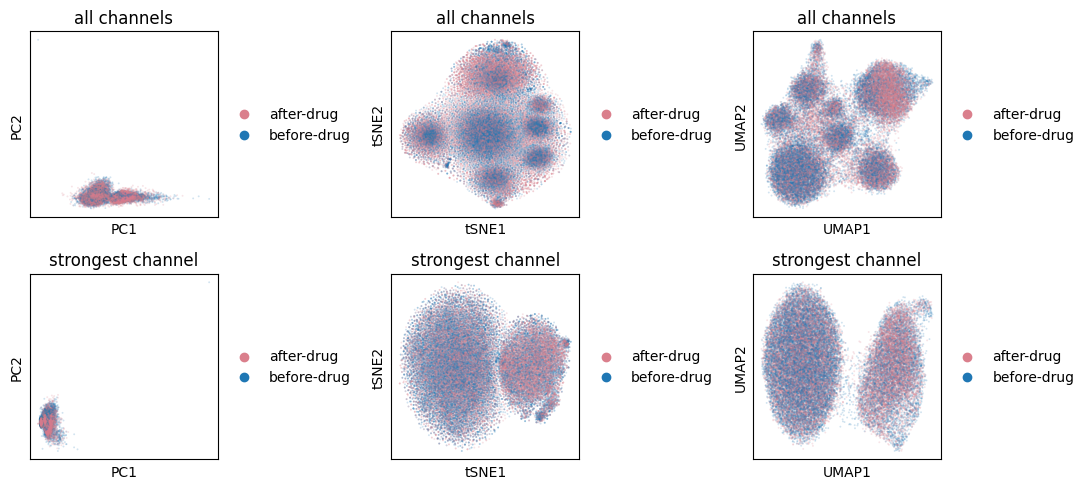

In [41]:
n_plot = 3
plt.figure(figsize=(11, 5))
ax = plt.subplot(2, n_plot, 1)
scanpy.pl.pca(waveforms_adata, color='condition', ax=ax, title='all channels', show=False, alpha=0.2, s=7.5, palette=palette)
ax = plt.subplot(2, n_plot, 2)
scanpy.pl.tsne(waveforms_adata, color='condition', ax=ax, title='all channels', show=False, alpha=0.2, s=7.5, palette=palette)
ax = plt.subplot(2, n_plot, 3)
scanpy.pl.umap(waveforms_adata, color='condition', ax=ax, title='all channels', show=False, alpha=0.2, s=7.5, palette=palette)
ax = plt.subplot(2, n_plot, 4)
scanpy.pl.pca(extremums_adata, color='condition', ax=ax, title='strongest channel', show=False, alpha=0.2, s=7.5, palette=palette)
ax = plt.subplot(2, n_plot, 5)
scanpy.pl.tsne(extremums_adata, color='condition', ax=ax, title='strongest channel', show=False, alpha=0.2, s=7.5, palette=palette)
ax = plt.subplot(2, n_plot, 6)
scanpy.pl.umap(extremums_adata, color='condition', ax=ax, title='strongest channel', show=False, alpha=0.2, s=7.5, palette=palette)
plt.tight_layout()
# plt.savefig(f'{figure_output_folder}/summary.png', transparent=True)
plt.show()
plt.close()